In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Load and inspect the data

In [2]:
data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv')

In [3]:
data.head(10)

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0
5,98,21,6.8,0,1,0,0,1,0,1,0
6,31,Gifted,7.6,0,1,0,0,0,0,0,0
7,3,Travelling Salesman,5.9,0,1,0,0,0,1,0,0
8,51,Avatar,7.9,0,0,0,0,0,0,0,0
9,47,The Karate Kid,7.2,0,1,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie ID     30 non-null     int64  
 1   Movie Name   30 non-null     object 
 2   IMDB Rating  30 non-null     float64
 3   Biography    30 non-null     int64  
 4   Drama        30 non-null     int64  
 5   Thriller     30 non-null     int64  
 6   Comedy       30 non-null     int64  
 7   Crime        30 non-null     int64  
 8   Mystery      30 non-null     int64  
 9   History      30 non-null     int64  
 10  Label        30 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ KB


In [5]:
data.describe()

,Movie ID,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,48.133333,7.696667,0.233333,0.600000,0.100000,0.100000,0.133333,0.100000,0.100000,0.0
std,29.288969,0.666169,0.430183,0.498273,0.305129,0.305129,0.345746,0.305129,0.305129,0.0
min,1.000000,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,27.750000,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,48.500000,7.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,64.250000,8.175000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,98.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


## EDA

Since the data is clean without any missing values, we do not have to clean the data. We visualize the distribution of each column to better understand the dataset.

<Axes: >

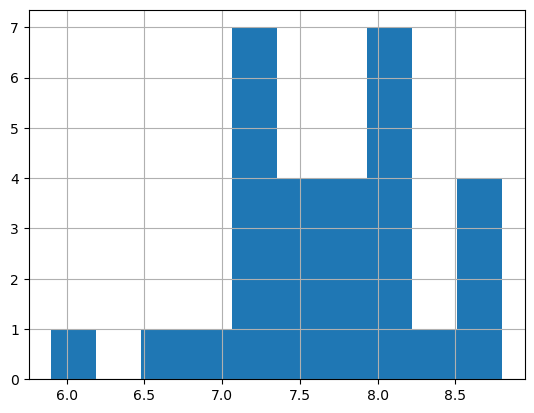

In [6]:
# we first show the histogram of the ratings
data['IMDB Rating'].hist()

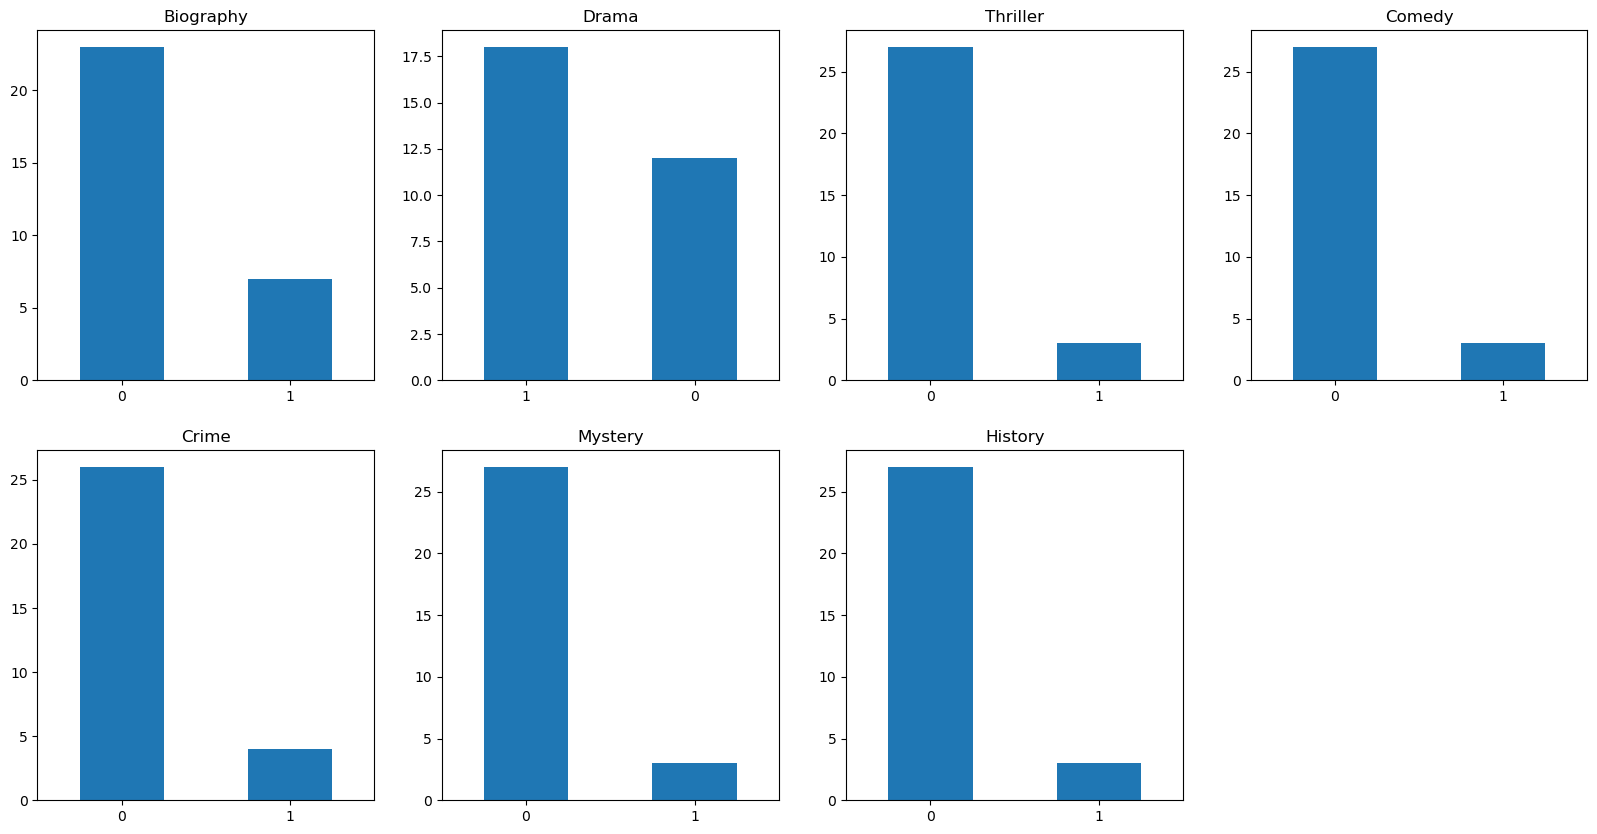

In [7]:
# we then show the bar plot of the distribution of each genre
genre_list = ['Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

# loop through each genre and create a bar plot
for i, genre in enumerate(genre_list):
    data[genre].value_counts().plot(kind='bar', ax=axs[i], title=genre)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0) # set x-tick labels to horizontal
    axs[i].set_xlabel('') # remove x-label

axs[-1].remove()

## KNN neighbor

In [8]:
data.head(5)

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [9]:
# we drop the columns that are not needed and split the data into X and y
X = data.drop(columns=['Movie ID', 'Movie Name', 'Label'])
y = data['Label']

# build the KNN model and fit the data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y) # the label y does not actually matter because we only care about th nearest neighbors

KNeighborsClassifier()

## Apply the KNN model to the movie "The Post"

In [10]:
# first we create the dataframe for the new movie

test_data = {
    'IMDB Rating': [7.2],
    'Biography': ['Yes'],
    'Drama': ['Yes'],
    'Thriller': ['No'],
    'Comedy': ['No'],
    'Crime': ['No'],
    'Mystery': ['No'],
    'History': ['Yes']
}

test_data = pd.DataFrame(test_data)

# transform the categorical columns to numerical columns
test_data.replace({'Yes': 1, 'No': 0}, inplace=True)
test_data

,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
0,7.2,1,1,0,0,0,0,1


In [11]:
# we then use the KNN to predict the nearest 5 movies to this movie
closest_movies = knn.kneighbors(test_data, return_distance=False)

# display the nearest 5 movies
print ('The 5 nearest movies to "The Post" are:')
data.iloc[closest_movies[0]]

The 5 nearest movies to "The Post" are:


,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
28,86,12 Years a Slave,8.1,1,1,0,0,0,0,1,0
27,1,Hacksaw Ridge,8.2,1,1,0,0,0,0,1,0
29,46,Queen of Katwe,7.4,1,1,0,0,0,0,0,0
16,44,The Wind Rises,7.8,1,1,0,0,0,0,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
